In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv("Titanic_v2.csv")
df.isnull().sum()


id_passager               0
Survivant                 0
Classe                    0
Nom                       0
Sex                       0
Age                     177
Frere_Soeur_conjoint      0
Nb_Parent_Enf             0
dtype: int64

In [3]:
dfS_A=df[df["Age"].isnull()].copy()
dfS_A["Sex"].count()
dfS_A.head()


,id_passager,Survivant,Classe,Nom,Sex,Age,Frere_Soeur_conjoint,Nb_Parent_Enf
5,6,0,3,"Moran, Mr. James",M,NaN,0,0
17,18,1,2,"Williams, Mr. Charles Eugene",M,NaN,0,0
19,20,1,3,"Masselmani, Mrs. Fatima",F,NaN,0,0
26,27,0,3,"Emir, Mr. Farred Chehab",M,NaN,0,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",F,NaN,0,0


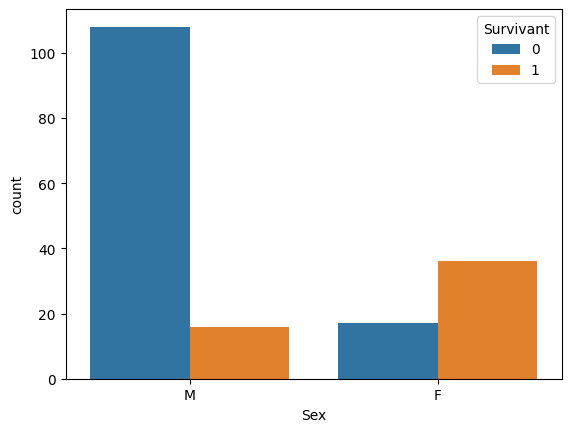

In [4]:
ax=sns.countplot(data=dfS_A,x="Sex",hue="Survivant")

In [5]:
dfS_A_grouped=dfS_A.groupby(["Survivant","Sex","Classe"]).size().reset_index(name="Comptage").copy() 
dfS_A_grouped

,Survivant,Sex,Classe,Comptage
0,0,F,3,17
1,0,M,1,16
2,0,M,2,7
3,0,M,3,85
4,1,F,1,9
5,1,F,2,2
6,1,F,3,25
7,1,M,1,5
8,1,M,2,2
9,1,M,3,9


In [6]:
df_pivot = (
    dfS_A_grouped.pivot_table(
        index=["Sex", "Classe"],
        columns="Survivant",
        values="Comptage",
        fill_value=0
    ).rename(columns={0: "Non Survivants", 1: "Survivants"}).reset_index())
df_pivot

Survivant,Sex,Classe,Non Survivants,Survivants
0,F,1,0.0,9.0
1,F,2,0.0,2.0
2,F,3,17.0,25.0
3,M,1,16.0,5.0
4,M,2,7.0,2.0
5,M,3,85.0,9.0


In [7]:
df_pivot["Total_classe"]=df_pivot["Non Survivants"]+df_pivot["Survivants"]
df_pivot

Survivant,Sex,Classe,Non Survivants,Survivants,Total_classe
0,F,1,0.0,9.0,9.0
1,F,2,0.0,2.0,2.0
2,F,3,17.0,25.0,42.0
3,M,1,16.0,5.0,21.0
4,M,2,7.0,2.0,9.0
5,M,3,85.0,9.0,94.0


In [8]:
df_pivot["Taux_survie"]=(df_pivot["Survivants"]/df_pivot["Total_classe"])*100
df_pivot

Survivant,Sex,Classe,Non Survivants,Survivants,Total_classe,Taux_survie
0,F,1,0.0,9.0,9.0,100.000000
1,F,2,0.0,2.0,2.0,100.000000
2,F,3,17.0,25.0,42.0,59.523810
3,M,1,16.0,5.0,21.0,23.809524
4,M,2,7.0,2.0,9.0,22.222222
5,M,3,85.0,9.0,94.0,9.574468


In [9]:
df_final=df_pivot.pivot_table("Taux_survie",index="Sex",columns="Classe").copy()

Text(0.5, 1.0, 'taux de survie selon le sexe et la classe')

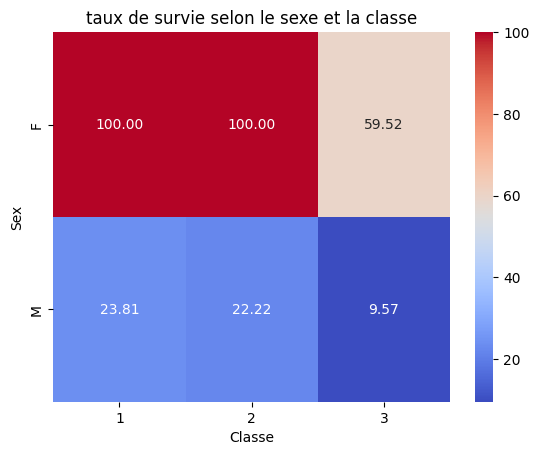

In [14]:
sns.heatmap(df_final,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("taux de survie selon le sexe et la classe")